In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
data_df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [7]:
data_df.describe(include='object')

,TransactionDate,TransactionType,Location
count,100000,100000,100000
unique,100000,2,10
top,2023-10-30 06:53:36.027441,refund,Chicago
freq,1,50131,10193


### 제안 3: 거래 유형별 고객 행동 분석
- 문제 정의:
  - 거래 유형(TransactionType)과 고객의 위치(Location)에 따라 고객의 행동 패턴을 분석합니다.
- 목표:
  - 지역별 거래 유형 비율 비교
  - 고객이 선호하는 거래 유형과 시간대 분석
  - 환불(refund) 요청 비율 및 환불 금액 분포 확인
- 배경:
  - 고객 행동 패턴을 이해하면, 특정 지역에서 선호되는 상품이나 서비스를 파악하고 환불 정책 개선에 활용할 수 있습니다.

### 결론
- 목표 별 확인
  - 지역별 거래 유형 비율 비교 : Los Angeles가 50.9% 로 가장 높았다.
  - 고객이 선호하는 거래 유형과 시간대 분석 : 아래 시간대에 환불율이 높았다.
    - 14:00-15:00 , 51.8%
    - 07:00-08:00 , 51.6%
    - 10:00-11:00 , 51.6%
    - 13:00-14:00 , 51.1%
    - 05:00-06:00 , 51.0%
  - 환불(refund) 요청 비율 및 환불 금액 분포 확인 : 아래 금액 구간에 환불율이 높았다.
    - 300.00-300.99   ,  52.1%
    - 1500.00-1500.99 ,  52.0%
    - 4900.00-4900.99 ,  52.0%
    - 2800.00-2800.99 ,  51.9%
    - 100.00-100.99   ,  51.6%

- 결론: 아래의 케이스 일때 환불하는 유형의 거래가 많았다.
  -  Amount_Range      Location   Time_Group  Refund_Rate   Total  refund 
  - 3900.00-3900.99   Los Angeles  07:00-08:00    85.714286   14.0    12.0  
  - 3400.00-3400.99   San Antonio  04:00-05:00    80.000000   15.0    12.0  
  - 2600.00-2600.99   San Antonio  15:00-16:00    80.000000   15.0    12.0  
  -   700.00-700.99   San Antonio  17:00-18:00    80.000000   15.0    12.0  
  - 4000.00-4000.99      New York  15:00-16:00    80.000000   15.0    12.0 
 
 
 
 
 


### 지역별 거래 유형 비율 비교
- Location object
- TransactionType object
- chi2

In [3]:
data_df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

In [4]:
data_df['TransactionType'].value_counts()

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

In [5]:
pivot_df = pd.pivot_table( data=data_df[['Location','TransactionType']], index='Location', columns='TransactionType', aggfunc=len)
pivot_df

TransactionType,purchase,refund
Location,,
Chicago,5026,5167
Dallas,5066,5010
Houston,4995,4996
Los Angeles,4878,5058
New York,4984,5009
Philadelphia,5011,4862
Phoenix,4929,5031
San Antonio,5057,5005
San Diego,5015,5096


In [6]:
stats.chi2_contingency(observed=pivot_df, correction=True) 


Chi2ContingencyResult(statistic=9.122034868163091, pvalue=0.42608648033501356, dof=9, expected_freq=array([[5083.14717, 5109.85283],
       [5024.80044, 5051.19956],
       [4982.41179, 5008.58821],
       [4954.98384, 4981.01616],
       [4983.40917, 5009.59083],
       [4923.56637, 4949.43363],
       [4966.9524 , 4993.0476 ],
       [5017.81878, 5044.18122],
       [5042.25459, 5068.74541],
       [4889.65545, 4915.34455]]))

In [78]:
# 1. 그룹화 및 카운트
counts_df = data_df.groupby(['Location', 'TransactionType']).size().reset_index(name='count')

# 2. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Location',
    columns='TransactionType',
    aggfunc='sum'
)

# 3. 환불율 계산
refund_rate['refund_rate'] = refund_rate['refund'] / (refund_rate['refund'] + refund_rate['purchase']) * 100
refund_rate.sort_values('refund_rate', ascending=False)

TransactionType,purchase,refund,refund_rate
Location,,,
Los Angeles,4878,5058,50.905797
Chicago,5026,5167,50.691651
Phoenix,4929,5031,50.512048
San Diego,5015,5096,50.400554
New York,4984,5009,50.125088
Houston,4995,4996,50.005005
San Jose,4908,4897,49.943906
San Antonio,5057,5005,49.741602
Dallas,5066,5010,49.722112


### 고객이 선호하는 거래 유형과 시간대 분석
- TransactionType object
- TransactionDate object,datetime
- chi2, 범주/연속

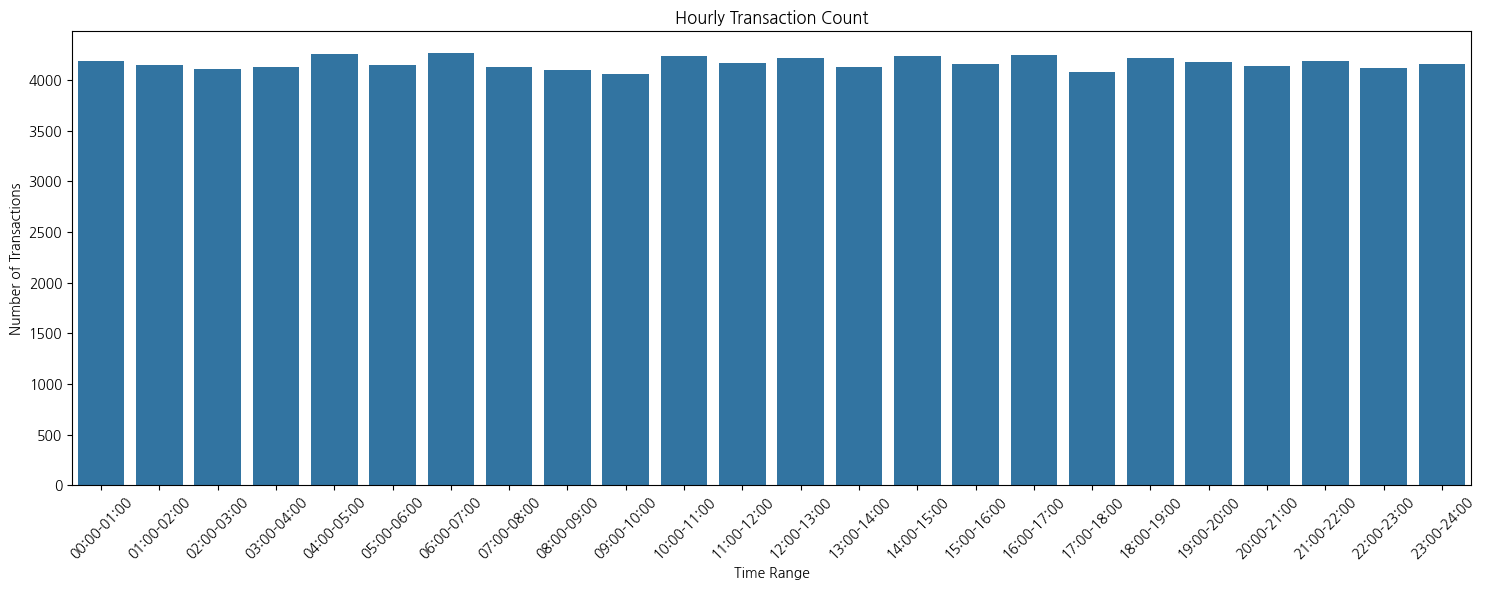

In [9]:
# 1. datetime에서 시간만 추출
data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour

# 2. 시간대별 거래 횟수 계산
hourly_counts = data_df.groupby('Hour').size().reset_index(name='count')

# 시간대 레이블 만들기
hourly_counts['Time_Range'] = hourly_counts['Hour'].apply(lambda x: f'{x:02d}:00-{(x+1):02d}:00')

plt.figure(figsize=(15, 6))
sns.barplot(data=hourly_counts, x='Time_Range', y='count')

plt.title('Hourly Transaction Count')
plt.xlabel('Time Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [79]:
# 1. 시간대 만들기
data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour
data_df['Time_Range'] = data_df['Hour'].apply(lambda x: f'{x:02d}:00-{(x+1):02d}:00')

# 2. 그룹화 및 카운트
counts_df = data_df.groupby(['Time_Range', 'TransactionType']).size().reset_index(name='count')

# 3. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Time_Range',
    columns='TransactionType',
    aggfunc='sum'
)

# 4. 환불율 계산
refund_rate['refund_rate'] = refund_rate['refund'] / (refund_rate['refund'] + refund_rate['purchase']) * 100

# 5. 시간대 순서대로 정렬 (선택사항)
# refund_rate = refund_rate.reindex(sorted(refund_rate.index, key=lambda x: int(x.split(':')[0])))

# 결과 출력
print(refund_rate.sort_values('refund_rate', ascending=False))

TransactionType  purchase  refund  refund_rate
Time_Range                                    
14:00-15:00          2040    2198    51.864087
07:00-08:00          1995    2131    51.648085
10:00-11:00          2049    2188    51.640312
13:00-14:00          2018    2113    51.149843
05:00-06:00          2030    2115    51.025332
11:00-12:00          2053    2115    50.743762
23:00-24:00          2060    2103    50.516454
17:00-18:00          2020    2060    50.490196
06:00-07:00          2118    2150    50.374883
03:00-04:00          2052    2081    50.350835
12:00-13:00          2093    2121    50.332226
19:00-20:00          2076    2103    50.323044
09:00-10:00          2018    2041    50.283321
02:00-03:00          2062    2043    49.768575
16:00-17:00          2136    2115    49.752999
15:00-16:00          2092    2063    49.651023
01:00-02:00          2091    2062    49.650855
20:00-21:00          2086    2050    49.564797
08:00-09:00          2075    2021    49.340820
04:00-05:00  

### 환불(refund) 요청 비율 및 환불 금액 분포 확인
- Amount float64
- TransactionType object
- 범주/연속

In [80]:
# 1. 그룹화 및 카운트
counts_df = data_df.groupby(['Amount', 'TransactionType']).size().reset_index(name='count')

# 2. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Amount',
    columns='TransactionType',
    aggfunc='sum'
)

# 3. 환불율 계산
refund_rate['refund_rate'] = refund_rate['refund'] / (refund_rate['refund'] + refund_rate['purchase']) * 100
refund_rate.sort_values('refund_rate', ascending=False)

TransactionType,purchase,refund,refund_rate
Amount,,,
812.89,1.0,3.0,75.0
1826.37,1.0,3.0,75.0
3851.96,1.0,3.0,75.0
3705.38,1.0,3.0,75.0
3446.52,1.0,3.0,75.0
...,...,...,...
4999.48,NaN,1.0,NaN
4999.51,NaN,1.0,NaN
4999.52,1.0,NaN,NaN


In [81]:
# 1. 정수 부분 추출 (floor 사용)
data_df['Amount_Group'] = (np.floor(data_df['Amount'] / 100) * 100)

# 또는 문자열 처리 방식으로:
# data_df['Amount_Group'] = data_df['Amount'].apply(lambda x: float(str(x).split('.')[0]))

# 2. 그룹 레이블 만들기 (예: "1.00-1.99")
data_df['Amount_Range'] = data_df['Amount_Group'].apply(lambda x: f"{int(x)}.00-{int(x)}.99")

# 3. 그룹화 및 카운트
counts_df = data_df.groupby(['Amount_Range', 'TransactionType']).size().reset_index(name='count')

# 4. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Amount_Range',
    columns='TransactionType',
    aggfunc='sum'
)

# 5. 환불율 계산
refund_rate['refund_rate'] = refund_rate['refund'] / (refund_rate['refund'] + refund_rate['purchase']) * 100

# 6. 금액 순서대로 정렬
refund_rate = refund_rate.reindex(sorted(refund_rate.index, key=lambda x: float(x.split('-')[0])))

print(refund_rate.sort_values('refund_rate', ascending=False))

TransactionType  purchase  refund  refund_rate
Amount_Range                                  
300.00-300.99         962    1047    52.115480
1500.00-1500.99       970    1055    52.098765
4900.00-4900.99       942    1021    52.012226
2800.00-2800.99       934    1008    51.905252
100.00-100.99         985    1051    51.620825
4700.00-4700.99       935     988    51.378055
3000.00-3000.99       968    1020    51.307847
4300.00-4300.99       988    1038    51.233959
600.00-600.99         975    1021    51.152305
2300.00-2300.99       966    1011    51.138088
1800.00-1800.99      1012    1052    50.968992
4200.00-4200.99       998    1034    50.885827
800.00-800.99         963     996    50.842266
4100.00-4100.99      1002    1033    50.761671
4800.00-4800.99      1007    1035    50.685602
1400.00-1400.99      1004    1031    50.663391
3400.00-3400.99      1014    1040    50.632911
500.00-500.99         970     991    50.535441
2900.00-2900.99       973     994    50.533808
2000.00-2000.

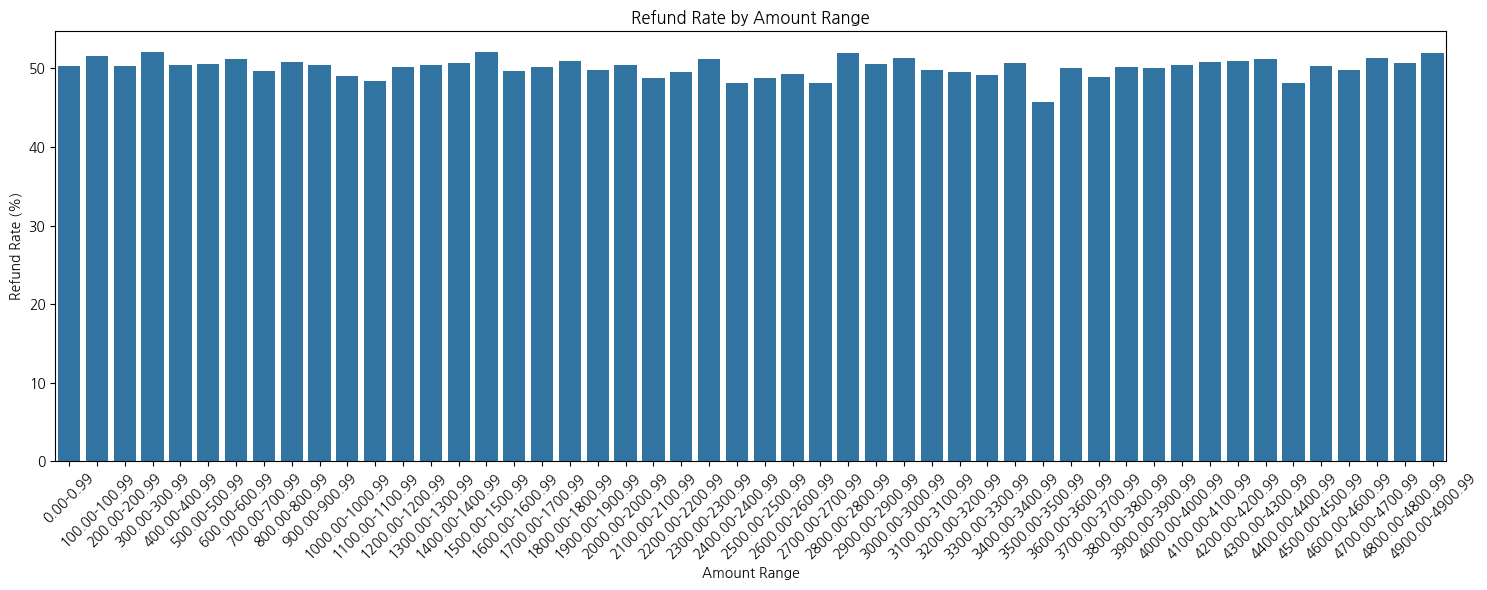

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(x=refund_rate.index, y=refund_rate['refund_rate'])

plt.title('Refund Rate by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Refund Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
# 1. 시간대 만들기
data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour
data_df['Time_Range'] = data_df['Hour'].apply(lambda x: f'{x:02d}:00-{(x+1):02d}:00')
# 1. 정수 부분 추출 (floor 사용)
data_df['Amount_Group'] = (np.floor(data_df['Amount'] / 100) * 100)

# 또는 문자열 처리 방식으로:
# data_df['Amount_Group'] = data_df['Amount'].apply(lambda x: float(str(x).split('.')[0]))

# 2. 그룹 레이블 만들기 (예: "1.00-1.99")
data_df['Amount_Range'] = data_df['Amount_Group'].apply(lambda x: f"{int(x)}.00-{int(x)}.99")

# 2. 그룹화 및 카운트
counts_df = data_df.groupby(['Time_Range', 'Amount_Range']).size().reset_index(name='count')

# 3. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Time_Range',
    columns='Amount_Range',
    aggfunc='sum'
)

# # 4. 환불율 계산
# refund_rate['refund_rate'] = refund_rate['refund'] / (refund_rate['refund'] + refund_rate['purchase']) * 100

# # 5. 시간대 순서대로 정렬 (선택사항)
# refund_rate = refund_rate.reindex(sorted(refund_rate.index, key=lambda x: int(x.split(':')[0])))

# 결과 출력
print(refund_rate)

Amount_Range  0.00-0.99  100.00-100.99  1000.00-1000.99  1100.00-1100.99  \
Time_Range                                                                 
00:00-01:00          77             92               92               83   
01:00-02:00          83             73               75               70   
02:00-03:00          87             75               82               85   
03:00-04:00          63             82               87               82   
04:00-05:00          89             92               88               93   
05:00-06:00          78             78               86               74   
06:00-07:00          87             95               86               83   
07:00-08:00          72             84               72               82   
08:00-09:00          90             76               85               81   
09:00-10:00          82             73               77               77   
10:00-11:00          83            107               73              102   
11:00-12:00 

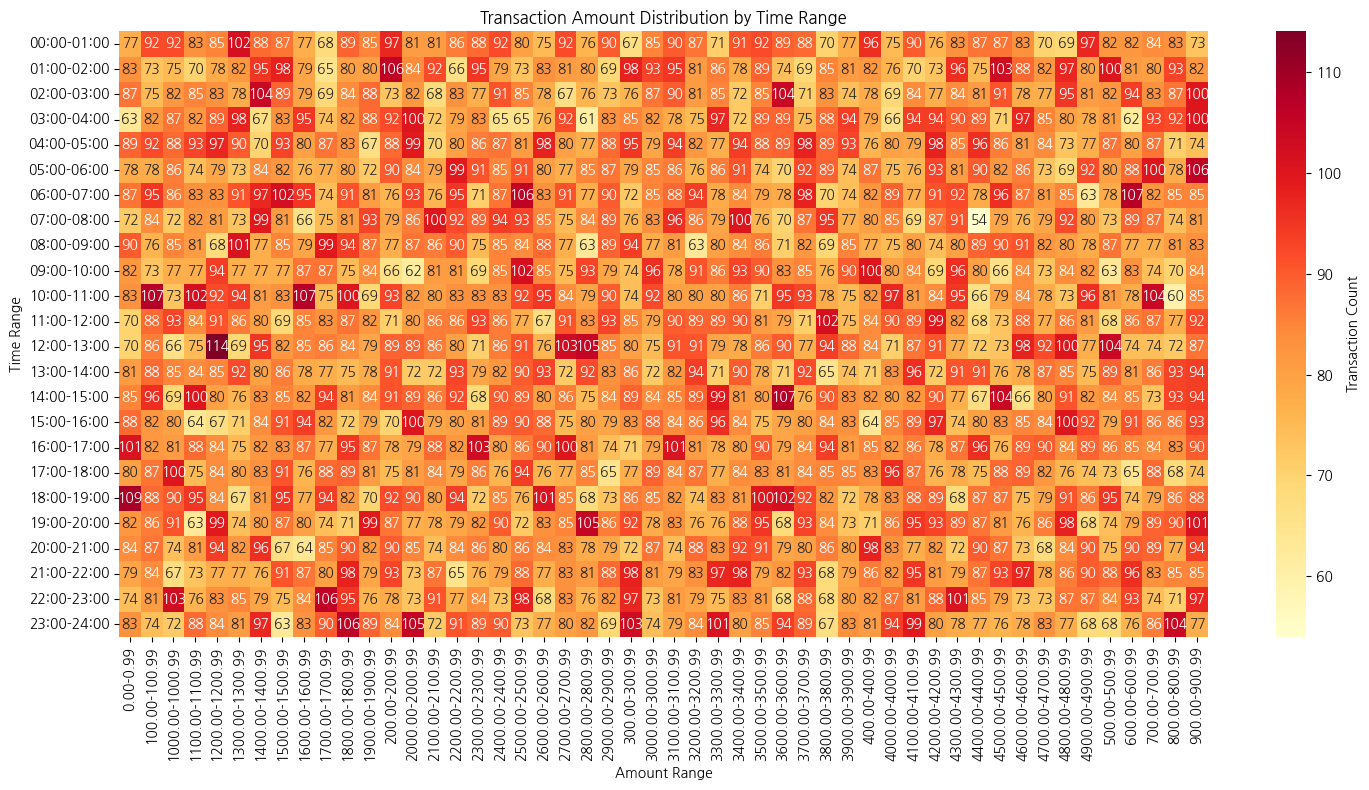

In [15]:
# 1. 히트맵 (가장 추천)
plt.figure(figsize=(15, 8))
sns.heatmap(refund_rate, 
            annot=True,  # 값 표시
            fmt='g',     # 정수 형식
            cmap='YlOrRd',  # 색상맵
            cbar_kws={'label': 'Transaction Count'})

plt.title('Transaction Amount Distribution by Time Range')
plt.xlabel('Amount Range')
plt.ylabel('Time Range')
plt.tight_layout()
plt.show()

### 제안 2: 이상 거래 탐지
- 문제 정의:
  - 거래 데이터(Amount, TransactionType, Location, IsFraud)를 바탕으로 이상 거래를 탐지하고, 거래 사기 가능성을 예측합니다.
- 목표:
  - 거래 금액의 분포 및 이상치 탐색
  - 거래 유형별 사기 발생률 비교
  - 사기 거래가 자주 발생하는 지역 및 시간대 식별
- 배경:
  - 이상 거래를 조기에 탐지함으로써 사기 방지 시스템을 강화하고, 금융 손실을 줄일 수 있습니다.

### 결론
- 목표 별 확인
  - 지역별 거래 유형 비율 비교 : 지역에 따른 환불율이 모두 50% 정도로 나온다. 
  - 고객이 선호하는 거래 유형과 시간대 분석 : 시간대에 따른 환불율이 모두 50% 정도로 나온다.
  - 환불(refund) 요청 비율 및 환불 금액 분포 확인 : 금액에 따른 환불율이 모두 50% 정도로 나온다.
  - 거래 금액의 분포 및 이상치 탐색 : 
  - 아래 금액 구간에서 사기 발생율이 높게 나타났다.
    - 금액 구간 ,    사기 발생율
    - 1200.00-1200.99 , 1.50%    
    - 4000.00-4000.99 , 1.42%    
    - 2800.00-2800.99 , 1.39%    
    - 200.00-200.99   , 1.33%    
    - 500.00-500.99   , 1.32%    
  - 거래 유형별 사기 발생률 비교 : 구매 일 때 0.98%, 환불 일 때 1.01% 로 거래 유형별 차이는 크지 않았다.
  - 사기 거래가 자주 발생하는 지역 및 시간대 식별 : 
    - 지역은 1.16% 로 New York이 제일 사기 발생율이 높았다.
    - 시간은 아래 시간대 에서 사기 발생율이 높게 나타났다.
      - 시간대 ,    사기 발생율
      - 18:00-19:00 , 1.30%
      - 01:00-02:00 , 1.25%
      - 08:00-09:00 , 1.24%
      - 00:00-01:00 , 1.12%
      - 04:00-05:00 , 1.10%

- 결론: 아래 케이스면 위험하다고 탐지 할 수 있을 것으로 보인다.
  - 금액, 지역, 시간, 거래유형에 따른 사기 비율이 가장 높은 케이스는 아래와 같다. 
  - Amount      Location         Time   TransactionType  Fraud_Rate   Total  Fraud 
  - 1800.00-1800.99 Houston  18:00-19:00          refund   66.666667    3      2  
  - 1400.00-1400.99 Phoenix  05:00-06:00        purchase   66.666667    3      2  
  - 3600.00-3600.99 Chicago  07:00-08:00        purchase   66.666667    3      2  
  - 1200.00-1200.99 Chicago  21:00-22:00          refund   50.000000    4      2  
  - 1500.00-1500.99 San Jose  08:00-09:00          refund   50.000000   4      2  

  
  
  
  
  

### 거래 금액의 분포 및 이상치 탐색
- Amount float64
- IsFraud object
- 범주/연속

In [16]:
# 1. 정수 부분 추출 (floor 사용)
data_df['Amount_Group'] = (np.floor(data_df['Amount'] / 100) * 100)

# 또는 문자열 처리 방식으로:
# data_df['Amount_Group'] = data_df['Amount'].apply(lambda x: float(str(x).split('.')[0]))

# 2. 그룹 레이블 만들기 (예: "1.00-1.99")
data_df['Amount_Range'] = data_df['Amount_Group'].apply(lambda x: f"{int(x)}.00-{int(x)}.99")

# 3. 그룹화 및 카운트
counts_df = data_df.groupby(['Amount_Range', 'IsFraud']).size().reset_index(name='count')
counts_df['IsFraud'] = counts_df['IsFraud'].map({0: 'normal', 1: 'fraud'})

# 4. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Amount_Range',
    columns='IsFraud',
    aggfunc='sum'
)

# 5. 환불율 계산
refund_rate['fraud_rate'] = refund_rate['fraud'] / (refund_rate['fraud'] + refund_rate['normal']) * 100

# 6. 금액 순서대로 정렬
refund_rate = refund_rate.reindex(sorted(refund_rate.index, key=lambda x: float(x.split('-')[0])))

print(refund_rate)

IsFraud          fraud  normal  fraud_rate
Amount_Range                              
0.00-0.99           19    1958    0.961052
100.00-100.99       23    2013    1.129666
200.00-200.99       27    1999    1.332675
300.00-300.99       18    1991    0.895968
400.00-400.99       14    1954    0.711382
500.00-500.99       26    1935    1.325854
600.00-600.99       15    1981    0.751503
700.00-700.99       17    2012    0.837851
800.00-800.99       15    1944    0.765697
900.00-900.99       15    2104    0.707881
1000.00-1000.99     24    1950    1.215805
1100.00-1100.99     25    1933    1.276813
1200.00-1200.99     31    2024    1.508516
1300.00-1300.99     22    1952    1.114488
1400.00-1400.99     16    2019    0.786241
1500.00-1500.99     21    2004    1.037037
1600.00-1600.99     22    1960    1.109990
1700.00-1700.99     14    1952    0.712106
1800.00-1800.99     18    2046    0.872093
1900.00-1900.99     15    1944    0.765697
2000.00-2000.99     19    2014    0.934579
2100.00-210

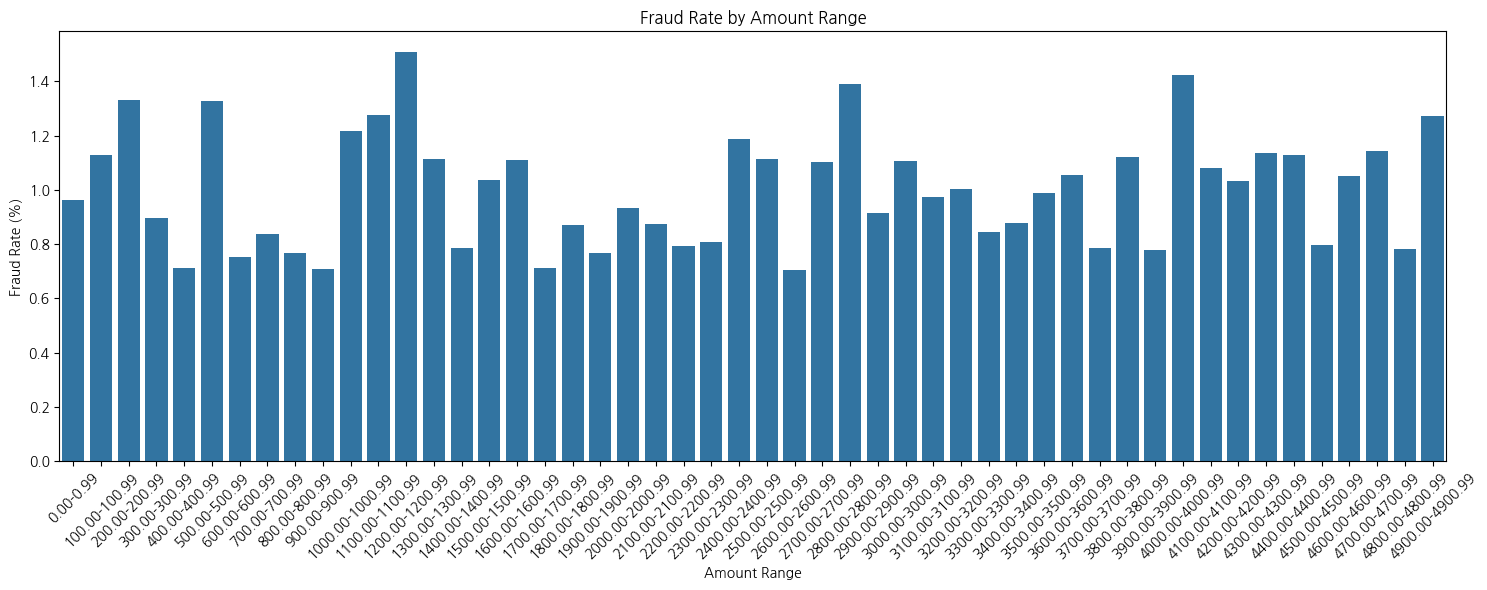


거래량 Top 5 구간:
Amount_Range
900.00-900.99      2119
1800.00-1800.99    2064
2500.00-2500.99    2062
1200.00-1200.99    2055
3400.00-3400.99    2054
dtype: int64

사기 거래 비율 Top 5 구간:
Amount_Range
1200.00-1200.99    1.508516
4000.00-4000.99    1.422042
2800.00-2800.99    1.390319
200.00-200.99      1.332675
500.00-500.99      1.325854
Name: fraud_rate, dtype: float64


In [17]:
# 기본 시각화
plt.figure(figsize=(15, 6))
sns.barplot(x=refund_rate.index, y=refund_rate['fraud_rate'])
plt.title('Fraud Rate by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 추가 분석을 위한 코드
# 1. 거래량이 많은 구간 확인
print("\n거래량 Top 5 구간:")
total_transactions = refund_rate['normal'] + refund_rate['fraud']
print(total_transactions.sort_values(ascending=False).head())

# 2. 사기 거래 비율이 높은 구간 확인
print("\n사기 거래 비율 Top 5 구간:")
print(refund_rate['fraud_rate'].sort_values(ascending=False).head())


### 거래 유형별 사기 발생률 비교
- TransactionType object
- IsFraud object
- chi2

In [18]:

# 3. 그룹화 및 카운트
counts_df = data_df.groupby(['TransactionType', 'IsFraud']).size().reset_index(name='count')
counts_df['IsFraud'] = counts_df['IsFraud'].map({0: 'normal', 1: 'fraud'})

# 4. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='TransactionType',
    columns='IsFraud',
    aggfunc='sum'
)

# 5. 환불율 계산
refund_rate['fraud_rate'] = refund_rate['fraud'] / (refund_rate['fraud'] + refund_rate['normal']) * 100

print(refund_rate)

IsFraud          fraud  normal  fraud_rate
TransactionType                           
purchase           493   49376     0.98859
refund             507   49624     1.01135


### 사기 거래가 자주 발생하는 지역 및 시간대 식별
- Location object
- TransactionDate object, datetime
- IsFraud object
- Location chi2
- date 범주, 연속 

In [45]:

# 3. 그룹화 및 카운트
counts_df = data_df.groupby(['Location', 'IsFraud']).size().reset_index(name='count')
counts_df['IsFraud'] = counts_df['IsFraud'].map({0: 'normal', 1: 'fraud'})

# 4. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Location',
    columns='IsFraud',
    aggfunc='sum'
)

# 5. 환불율 계산
refund_rate['fraud_rate'] = refund_rate['fraud'] / (refund_rate['fraud'] + refund_rate['normal']) * 100

print(refund_rate.sort_values(by='fraud_rate', ascending=False))

IsFraud       fraud  normal  fraud_rate
Location                               
New York        116    9877    1.160813
San Diego       115    9996    1.137375
Houston         105    9886    1.050946
Phoenix          99    9861    0.993976
San Antonio      99    9963    0.983900
Dallas           99    9977    0.982533
Los Angeles      95    9841    0.956119
Chicago          95   10098    0.932012
Philadelphia     90    9783    0.911577
San Jose         87    9718    0.887302


In [46]:
# 1. 시간대 만들기
data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour
data_df['Time_Range'] = data_df['Hour'].apply(lambda x: f'{x:02d}:00-{(x+1):02d}:00')

# 3. 그룹화 및 카운트
counts_df = data_df.groupby(['Time_Range', 'IsFraud']).size().reset_index(name='count')
counts_df['IsFraud'] = counts_df['IsFraud'].map({0: 'normal', 1: 'fraud'})

# 4. pivot_table 생성
refund_rate = counts_df.pivot_table(
    values='count',
    index='Time_Range',
    columns='IsFraud',
    aggfunc='sum'
)

# 5. 환불율 계산
refund_rate['fraud_rate'] = refund_rate['fraud'] / (refund_rate['fraud'] + refund_rate['normal']) * 100

# 5. 시간대 순서대로 정렬 (선택사항)
# refund_rate = refund_rate.reindex(sorted(refund_rate.index, key=lambda x: int(x.split(':')[0])))

print(refund_rate.sort_values(by='fraud_rate', ascending=False))

IsFraud      fraud  normal  fraud_rate
Time_Range                            
18:00-19:00     55    4165    1.303318
01:00-02:00     52    4101    1.252107
08:00-09:00     51    4045    1.245117
00:00-01:00     47    4140    1.122522
04:00-05:00     47    4208    1.104583
03:00-04:00     45    4088    1.088797
07:00-08:00     44    4082    1.066408
09:00-10:00     43    4016    1.059374
11:00-12:00     43    4125    1.031670
22:00-23:00     42    4073    1.020656
10:00-11:00     43    4194    1.014869
06:00-07:00     43    4225    1.007498
16:00-17:00     41    4210    0.964479
15:00-16:00     40    4115    0.962696
19:00-20:00     40    4139    0.957167
20:00-21:00     39    4097    0.942940
02:00-03:00     38    4067    0.925700
05:00-06:00     38    4107    0.916767
14:00-15:00     38    4200    0.896649
21:00-22:00     37    4149    0.883899
12:00-13:00     37    4177    0.878026
23:00-24:00     35    4128    0.840740
13:00-14:00     32    4099    0.774631
17:00-18:00     30    405

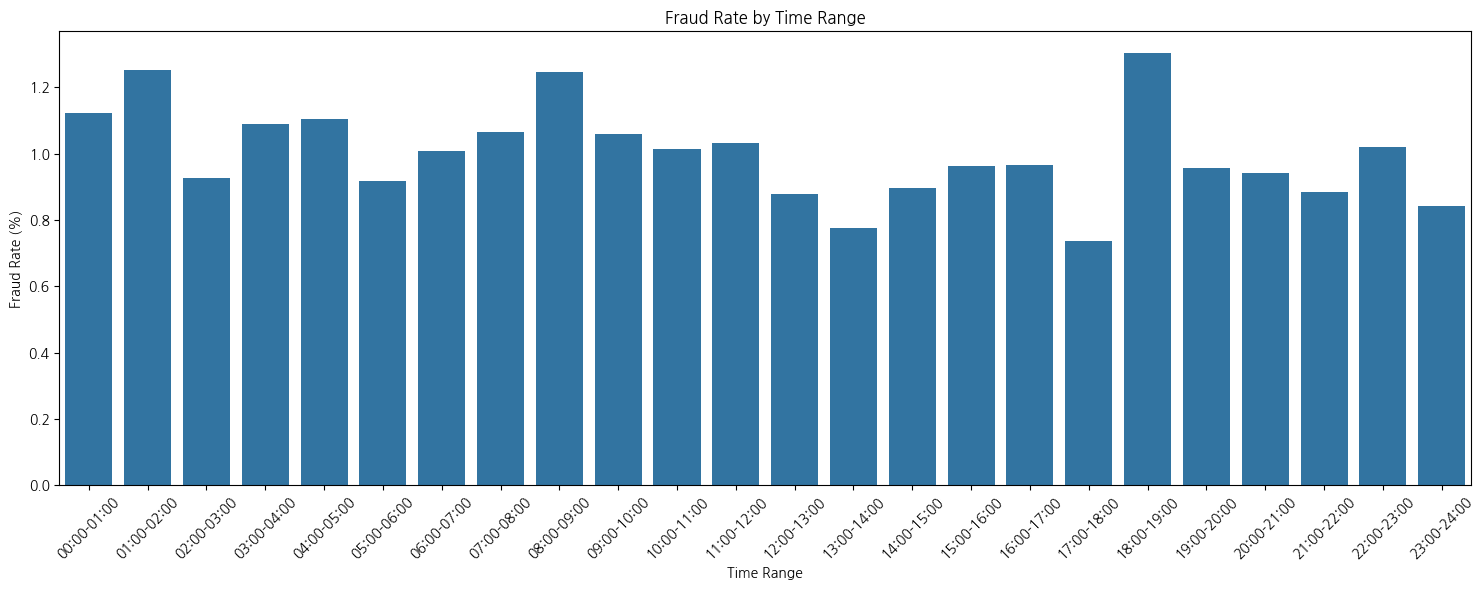


시간대별 Top 5 구간:
Time_Range
06:00-07:00    4268
04:00-05:00    4255
16:00-17:00    4251
14:00-15:00    4238
10:00-11:00    4237
dtype: int64

사기 거래 비율 Top 5 시간대:
Time_Range
18:00-19:00    1.303318
01:00-02:00    1.252107
08:00-09:00    1.245117
00:00-01:00    1.122522
04:00-05:00    1.104583
Name: fraud_rate, dtype: float64


In [21]:
# 기본 시각화
plt.figure(figsize=(15, 6))
sns.barplot(x=refund_rate.index, y=refund_rate['fraud_rate'])
plt.title('Fraud Rate by Time Range')
plt.xlabel('Time Range')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 추가 분석을 위한 코드
# 1. 시간대별 거래가 많은 구간 확인
print("\n시간대별 Top 5 구간:")
total_time_transactions = refund_rate['normal'] + refund_rate['fraud']
print(total_time_transactions.sort_values(ascending=False).head())

# 2. 사기 거래 비율이 높은 시간대 확인
print("\n사기 거래 비율 Top 5 시간대:")
print(refund_rate['fraud_rate'].sort_values(ascending=False).head())

In [35]:
# 데이터 전처리
def prepare_data(data_df):
    # # 시간대 그룹화 (4시간 단위)
    # data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour
    # data_df['Time_Group'] = pd.cut(data_df['Hour'], 
    #                               bins=[0,6,12,18,24], 
    #                               labels=['00-06', '06-12', '12-18', '18-24'])
    # 1. 시간대 만들기
    data_df['Hour'] = pd.to_datetime(data_df['TransactionDate']).dt.hour
    data_df['Time_Group'] = data_df['Hour'].apply(lambda x: f'{x:02d}:00-{(x+1):02d}:00')


    # # 금액 그룹화 (1000단위)
    # data_df['Amount_Group'] = pd.cut(data_df['Amount'], 
    #                                 bins=[0,1000,2000,3000,4000,5000], 
    #                                 labels=['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K'])
    # 1. 정수 부분 추출 (floor 사용)
    data_df['Amount_Group'] = (np.floor(data_df['Amount'] / 100) * 100)
    # 2. 그룹 레이블 만들기 (예: "1.00-1.99")
    data_df['Amount_Range'] = data_df['Amount_Group'].apply(lambda x: f"{int(x)}.00-{int(x)}.99")

    return data_df

# 사기 비율 계산 함수
def calculate_fraud_rate(data_df, feature):
    grouped = data_df.groupby(feature)['IsFraud'].agg(['count', 'sum'])
    grouped['fraud_rate'] = (grouped['sum'] / grouped['count']) * 100
    return grouped

In [74]:
# 데이터 준비
plot_df = prepare_data(data_df)

# 2. 복합 조건에서의 사기 비율 계산
fraud_analysis = plot_df.groupby(['Amount_Range', 'Location', 'Time_Group', 'TransactionType']).\
    agg({'IsFraud': ['count', 'sum']}).reset_index()
fraud_analysis.columns = ['Amount', 'Location', 'Time', 'TransactionType', 'Total', 'Fraud']
fraud_analysis['Fraud_Rate'] = (fraud_analysis['Fraud'] / fraud_analysis['Total']) * 100

# 3. 사기 비율이 높은 상위 케이스 확인
top_fraud_cases = fraud_analysis[fraud_analysis['Total'] >= 10].sort_values('Fraud_Rate', ascending=False).head(20)
print("\nTop Fraud Patterns:") 
print(top_fraud_cases[['Amount', 'Location', 'Time', 'TransactionType', 'Fraud_Rate', 'Total', 'Fraud']])


Top Fraud Patterns:
                Amount      Location         Time TransactionType  Fraud_Rate  \
9807   2700.00-2700.99     San Diego  00:00-01:00        purchase   20.000000   
4967   1800.00-1800.99  Philadelphia  08:00-09:00        purchase   10.000000   
12173  3100.00-3100.99     San Diego  01:00-02:00          refund   10.000000   
18860  4400.00-4400.99      San Jose  06:00-07:00        purchase   10.000000   
23348    900.00-900.99      New York  03:00-04:00        purchase   10.000000   
12109  3100.00-3100.99       Phoenix  17:00-18:00          refund   10.000000   
18525  4400.00-4400.99       Houston  03:00-04:00          refund   10.000000   
4941   1800.00-1800.99      New York  18:00-19:00          refund   10.000000   
6458   2000.00-2000.99       Phoenix  22:00-23:00        purchase   10.000000   
11637  3000.00-3000.99       Phoenix  18:00-19:00          refund   10.000000   
21198  4900.00-4900.99     San Diego  15:00-16:00          refund   10.000000   
22581  

In [77]:
# 3. 사기 비율이 높은 상위 케이스 확인
top_fraud_cases = fraud_analysis[fraud_analysis['Fraud'] >= 2].sort_values('Fraud_Rate', ascending=False).head(20)
print("\nTop Fraud Patterns:")
print(top_fraud_cases[['Amount', 'Location', 'Time', 'TransactionType', 'Fraud_Rate', 'Total', 'Fraud']])


Top Fraud Patterns:
                Amount      Location         Time TransactionType  Fraud_Rate  \
4848   1800.00-1800.99       Houston  18:00-19:00          refund   66.666667   
3130   1400.00-1400.99       Phoenix  05:00-06:00        purchase   66.666667   
14172  3600.00-3600.99       Chicago  07:00-08:00        purchase   66.666667   
1932   1200.00-1200.99       Chicago  21:00-22:00          refund   50.000000   
3747   1500.00-1500.99      San Jose  08:00-09:00          refund   50.000000   
13272  3400.00-3400.99        Dallas  07:00-08:00        purchase   50.000000   
11850  3100.00-3100.99        Dallas  06:00-07:00        purchase   50.000000   
1359   1000.00-1000.99     San Diego  16:00-17:00          refund   50.000000   
4956   1800.00-1800.99  Philadelphia  02:00-03:00        purchase   40.000000   
11782  3000.00-3000.99      San Jose  20:00-21:00        purchase   40.000000   
10242  2800.00-2800.99   San Antonio  06:00-07:00          refund   40.000000   
1311   

In [71]:
# 데이터 준비
plot_df = prepare_data(data_df)

# 그룹화 및 카운트
counts_df = plot_df.groupby(['Amount_Range', 'Location', 'Time_Group', 'TransactionType']).size().reset_index(name='count')

# pivot_table 생성
refund_analysis = counts_df.pivot_table(
    values='count',
    index=['Amount_Range', 'Location', 'Time_Group'],
    columns='TransactionType',
    aggfunc='sum'
).reset_index()

# NaN 값을 0으로 채우기
refund_analysis = refund_analysis.fillna(0)

# 환불 비율 계산
refund_analysis['Total'] = refund_analysis['purchase'] + refund_analysis['refund']
refund_analysis['Refund_Rate'] = (refund_analysis['refund'] / refund_analysis['Total']) * 100

# 상위 환불 패턴 확인 (최소 10건 이상의 거래가 있는 경우)
top_refund_cases = refund_analysis[refund_analysis['refund'] >= 12].sort_values('Refund_Rate', ascending=False).head(20)
print("\nTop Refund Patterns:")
print(top_refund_cases[['Amount_Range', 'Location', 'Time_Group', 'Refund_Rate', 'Total', 'refund']])


Top Refund Patterns:
TransactionType     Amount_Range      Location   Time_Group  Refund_Rate  \
7992             3900.00-3900.99   Los Angeles  07:00-08:00    85.714286   
6887             3400.00-3400.99   San Antonio  04:00-05:00    80.000000   
4740             2600.00-2600.99   San Antonio  15:00-16:00    80.000000   
11458              700.00-700.99   San Antonio  17:00-18:00    80.000000   
8504             4000.00-4000.99      New York  15:00-16:00    80.000000   
2442             1800.00-1800.99        Dallas  20:00-21:00    73.684211   
8279               400.00-400.99  Philadelphia  06:00-07:00    72.222222   
902              1100.00-1100.99   San Antonio  14:00-15:00    66.666667   
10320            4800.00-4800.99       Chicago  07:00-08:00    66.666667   
9495             4400.00-4400.99  Philadelphia  22:00-23:00    63.157895   
442                100.00-100.99     San Diego  10:00-11:00    63.157895   
1752             1500.00-1500.99   Los Angeles  01:00-02:00    60.